<a href="https://colab.research.google.com/github/lmendezayl/modelado-continuo/blob/main/trabajos-practicos/TP2IMC2025_MENDEZ_STANGALINI_DRELEWICZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**) - 2do Cuatrimestre 2025 - Cátedra Mindlin
# **Trabajo Práctico 2**

Este es el trabajo práctico de los ejes temáticos 2 y 3. Se trata de un conjunto de ejercicios que deben resolver numéricamente y entregar para el **domingo 16 de noviembre, inclusive**. El trabajo es en **grupos de entre 2 y 3 personas**. Deben desarrollar los ejercicios en una **notebook** de Python en Google Colab. Deben **compartir el link del archivo final** (previamente dando permisos para compartir como lector), alojado en el Google Drive de alguno de los integrantes del grupo, y mandar el link del archivo al mail *hbocaccio@gmail.com*. Deben **enviar un único mail por grupo**. El nombre del archivo debe incluir los apellidos de los integrantes del grupo separados con guión bajo, resultando el siguiente **formato “TP2IMC2025_APELLIDO1_APELLIDO2_APELLIDO3.ipynb”**.

El contenido del archivo debe incluir las celdas de código necesarias para responder las consignas, intercalando con celdas de texto en las que cuenten lo que hicieron de manera resumida. También deben incluir texto explicando los resultados obtenidos y cómo estos responden a las consignas planteadas. Se valorará cualquier tipo de discusión de los resultados en referencia a conceptos tanto de la parte numérica como de la parte teórica. No es necesario que se extiendan mucho en las explicaciones, pero sí que muestren conocimientos adquiridos a lo largo de la cursada en referencia a los contenidos fundamentales de la materia.


## Nota a los profes

Estamos usando como versión del TP a Pi-thon (Python 3.14). Si alguna libreria no funciona en versiones anteriores, por favor crear un venv a partir de esta versión y volver a correr el TP. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

---
# Ejercicio 1

Sea la siguiente función definida a trozos

$$
f(x) =
\begin{cases}
1 + 2x & \text{si } -1 \leq x \leq 0 \\
1 - 2x & \text{si } 0 \leq x \leq 1 \\
\end{cases}
$$

1.1. Defina una función de Python que permita calcular los valores de la función para el dominio correspondiente, y grafiquela.


In [ ]:
# Definimos la función f
def f(x):
    # np.all para manejar arrays
    if not (np.all(-1 <= x) and np.all(x <= 1)): 
        return None
    return 1 - 2 * abs(x)

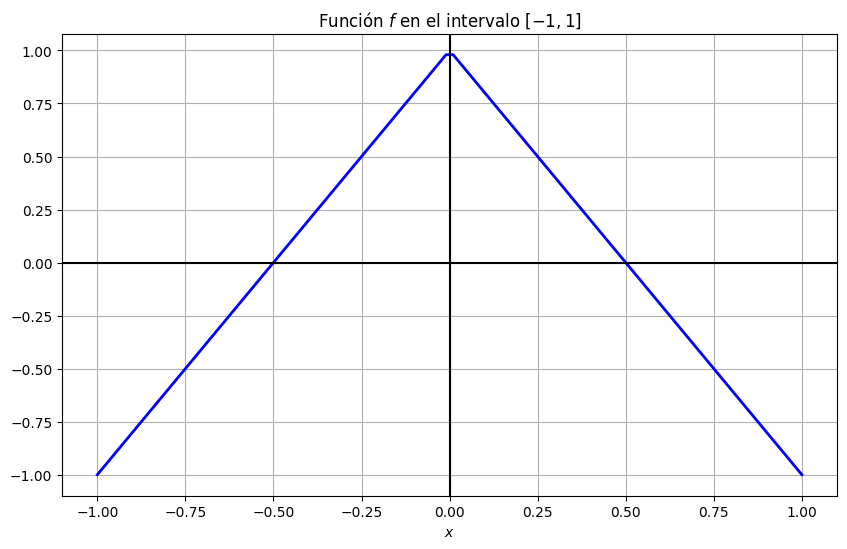

In [73]:
# Graficamos la función f en el intervalo [-1, 1]
N = 100
xs = np.linspace(-1, 1, N)

plt.figure(figsize=(10, 6))
plt.plot(xs, f(xs), color='blue', lw=2)
plt.axvline(0, color='black', lw=1.5)
plt.axhline(0, color='black', lw=1.5)
plt.title("Función $f$ en el intervalo $[-1,1]$")
plt.xlabel("$x$")
plt.grid()


1.2. La función tiene una paridad definida. Es par o impar? Mostrar con las herramientas numéricas que considere, evidencias que abonen a su especulación?


Para ver que una funcion es par, pordemos calcular la integral de la funcion $f$ en los intervalos $[-1, 0]$ y $[0, 1]$, y ver si se cumple que valen lo mismo:

In [27]:
# Verificamos que las integrales son iguales
x1 = np.linspace(0, 1, 1000)
x2 = np.linspace(-1, 0, 1000)

int1 = np.trapezoid(f(x1), x1)
int2 = np.trapezoid(f(x2), x2)

# Redondeamos a 5 decimales para mostrar que son iguales
print("La suma de las integrales es:", round(int1 + int2, 5)) 

La suma de las integrales es: 0.0


Ademas, la función es par ya que se cumple que $f(-x) = f(x)$. Es trivial ver que dado $x \in [0,1]$, entonces vale que $-x \in [-1,0]$. Entonces
$$f(-x) = 1+2(-x) = 1-2x = f(x)$$

Idem para $x \in [-1,0]$. Entonces $f$ es par.




Además, se puede ver graficamente que la función cumple con la simétria de una función par (función tipo coseno, simétrica respecto al eje $y$):

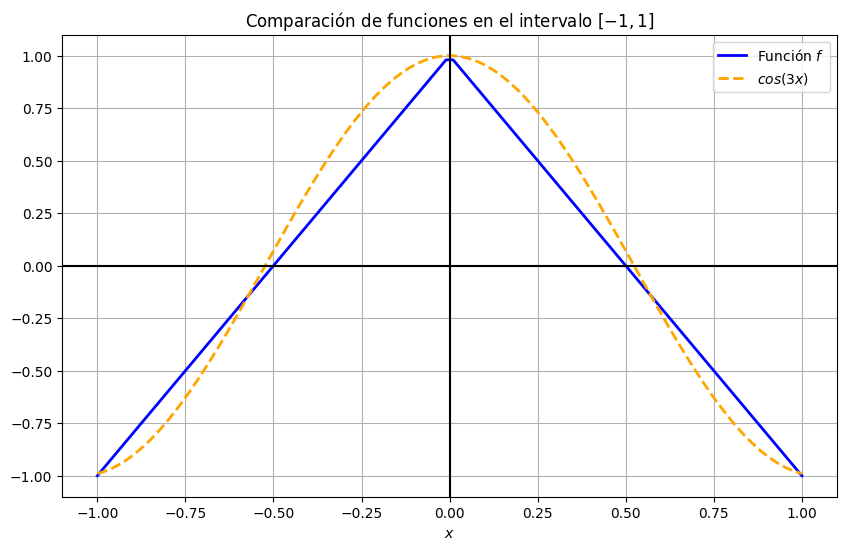

In [72]:
N = 100
xs = np.linspace(-1, 1, N)

plt.figure(figsize=(10, 6))
plt.plot(xs, f(xs), label="Función $f$", color='blue', lw=2)
plt.plot(xs, np.cos(3*xs), label='$cos(3x)$', color='orange', lw=2, linestyle='--')
plt.axvline(x=0, color='black', lw=1.5)
plt.axhline(y=0, color='black', lw=1.5)

plt.title("Comparación de funciones en el intervalo $[-1,1]$")
plt.xlabel("$x$")
plt.grid()
plt.legend()

1.3. Suponiendo que quiere aproximar la función definida en este dominio acotado por un desarrollo de Fourier con las consideraciones correspondientes, por ejemplo acerca del periodo. Calcule los coeficientes de Fourier hasta order N=8. Haga los gráficos en los que se vean cuánto aporta cada coeficiente a la serie.

Sabemos que como es una función par, los terminos $b_n = 0$ para todo $n \in \mathbb{N}$.

Entonces solo resta calcular los coeficientes de los $a_n$. Definimos la función `coeffs` para calcularlos.

In [92]:
def coeffs(f, dh: int, N: int) -> tuple[float, list[float], list[float]]:
    """
    Calcula los coeficientes de la serie de Fourier de una funcion f desde -1
    hasta 1 usando la regla del trapecio con dh puntos, truncada en N términos.
    """

    # Nota: en los calculos de los coeficientes, no estoy considerando otros posibles valores de L=1
    # Como 1/L = 1, es lo mismo que esté o no. 
        
    x = np.linspace(-1, 1, dh)

    # Listas para almacenar los coeficientes
    coeffs_a: list[float] = []
    coeffs_b: list[float] = []

    # Coeficiente a_0
    a_0: float = np.trapezoid(f(x), x)
    
    # Es hasta N+1 porque el rango empieza en 1 y queremos N términos
    for n in range(1, N+1):
        a_n: float = np.trapezoid(f(x) * np.cos((n * np.pi * x)), x)
        b_n: float = np.trapezoid(f(x) * np.sin((n * np.pi * x)), x)
        coeffs_a.append(a_n)
        coeffs_b.append(b_n)
        
    return a_0, coeffs_a, coeffs_b

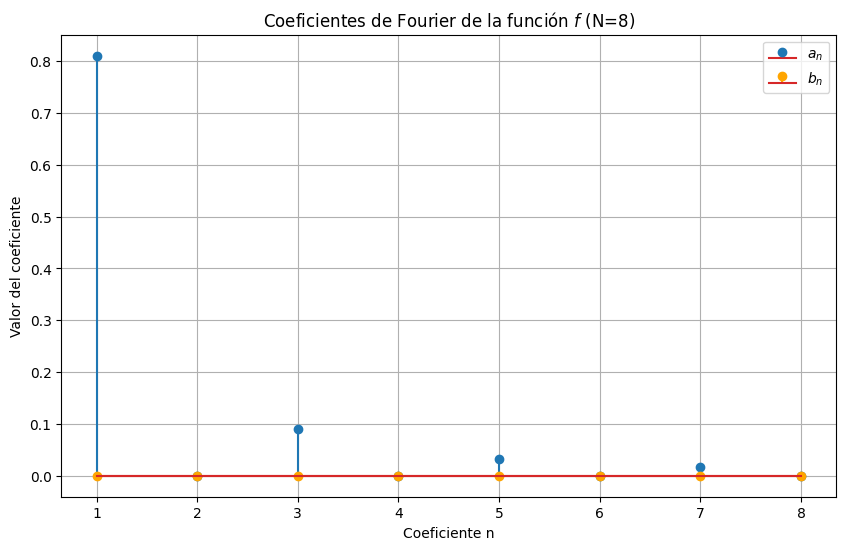

In [93]:
dh = 100 
N = 8

a0, coeffs_a, coeffs_b = coeffs(f, dh, N)

# Con plt.stem graficamos los coeficientes como barras verticales
plt.figure(figsize=(10, 6))
plt.stem(range(1, N+1), coeffs_a, label="$a_n$")
plt.stem(range(1, N+1), coeffs_b, label="$b_n$", linefmt='orange')

plt.title(f"Coeficientes de Fourier de la función $f$ (N={N})")
plt.xlabel("Coeficiente n")
plt.ylabel("Valor del coeficiente")
plt.grid()
plt.legend()
plt.show()



1.4. Calcule y grafique la estimación de la función con una serie de Fourier truncada a N=8 términos usando los coeficientes obtenidos previamente.

In [100]:
def f_fourier(coeffs: tuple[float, list[float], list[float]], x: float | int) -> float: 
        
    a_0, coeffs_a, coeffs_b = coeffs
    N = len(coeffs_a)    
    # No estoy considerando otros posibles valores de L=1

    terminos_An: float = 0
    terminos_Bn: float = 0
    
    for n in range(N):
        terminos_An += coeffs_a[n] * np.cos(n * np.pi * x)
        terminos_Bn += coeffs_b[n] * np.sin(n * np.pi * x)

    return a_0/2 + terminos_An + terminos_Bn

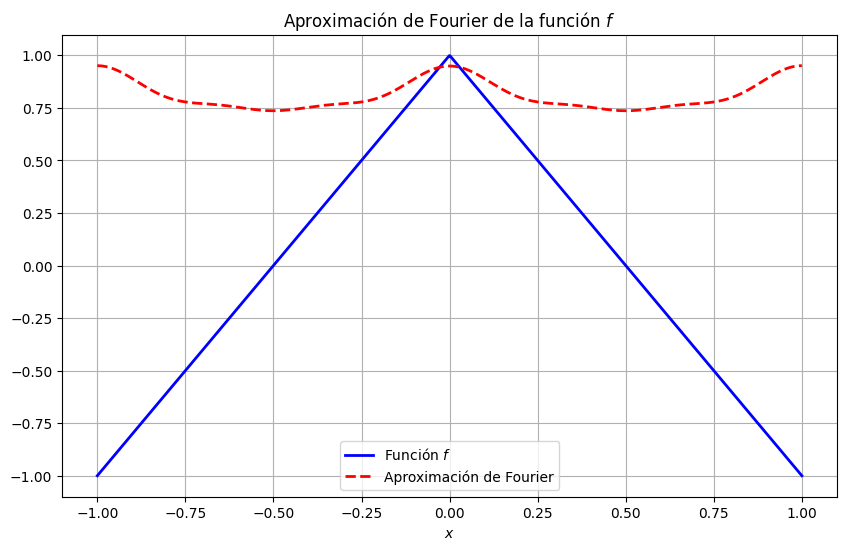

In [113]:
x = np.linspace(-1, 1, 1000)

a0, coeffs_a, coeffs_b = coeffs(f, dh, N)
y_fourier = f_fourier((a0, coeffs_a, coeffs_b), x)

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label="Función $f$", color='blue', lw=2)
plt.plot(x, y_fourier, label="Aproximación de Fourier", color='red', lw=2, linestyle='--')
plt.grid()
plt.title("Aproximación de Fourier de la función $f$")
plt.xlabel("$x$")
plt.legend()

# Preguntar  el 1.4!

---
# Ejercicio 2

Imagine un lanzamiento vertical de una pelota de básquet (modelo unidimensional vertical) desde el suelo en ($t=0$). La única aceleración es la gravedad ($g=9.8 m/s^{2}$) (sin rozamiento). Queremos que la pelota alcance la altura del aro ($H=3.05 m$) exactamente en $t=T=1.2 s$. El problema está descrito por la siguiente ecuación diferencial

$$
y''(t) = -g,\qquad t\in[0,T],
$$

con condiciones de contorno $y(0)=0$; $y(T)=H$.

2.1. Plantear una resolución del problema con el método de diferencias finitas usando diferencias centrales. Mostrar explícitamente cómo es la matriz de diferenciación usada y cómo queda planteado el problema de manera algebraica (hacer print() de las variables correspondientes). Resolver el problema algebraico usando `np.linalg.solve`. Graficar la solución junto con las condiciones de contorno, para visualizar su cumplimiento.

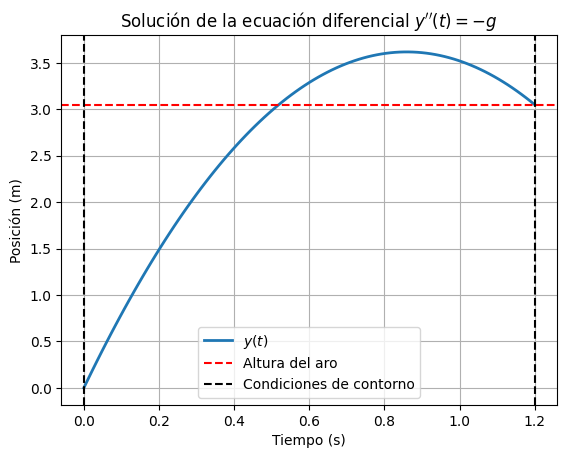

In [149]:
# Definimos constantes
G = 9.8 # metros/segundos²
H = 3.05 # metros
T = 1.2 # segundos

def solve(N: int, plot: bool):
    """
    Si plot es True, grafica la solucion y(t) del problema.
    """
    # Discretizamos dominio de las variables en una grilla de valores
    t = np.linspace(0, T, N+1)
    dt = t[1] - t[0]

    # Aproximación de la derivada segunda con amtriz de diferenciacion
    D = np.diag(-2 * np.ones(N+1)) + np.diag(np.ones(N), -1) + np.diag(np.ones(N), 1)
    D = D / (dt**2)
    
    # Lado derecho de la ec dif
    g = -G * np.ones(N+1)

    # Condiciones de contorno en la matriz 
    # Primer fila
    g[0] = 0
    D[0, :] = 0
    D[0][0] = 1

    # Ultima fila
    g[N] = H
    D[-1, :] = 0
    D[-1][-1] = 1

    y = np.round(np.linalg.solve(D, g), 4)
    if plot:
        plt.plot(t, y, label='$y(t)$', lw=2)
    
    return D, y, g


N = 100
_, _, _ = solve(N, plot=True) # llamo así porque no usamos estas variables
    
plt.axhline(H, color='red', linestyle='--', label='Altura del aro')
plt.axvline(0, color='black', linestyle='--')
plt.axvline(T, color='black', linestyle='--', label="Condiciones de contorno")

plt.title("Solución de la ecuación diferencial $y''(t) = -g$")
plt.xlabel("Tiempo (s)")

plt.ylabel("Posición (m)")
plt.legend()
plt.grid()


Y acá como queda el sistema lineal planteado para $N=5$ ($N$ más chico para poder ver el sistema entero):

In [144]:
N = 5
D, u, g = solve(N, plot=False)

print("D u = g\n")
for i in range(len(D)):
    fila = " ".join([f"{val:6.2f}" for val in D[i, :]])
    print(f"[ {fila} ]  [{u[i]:6.2f}] = [{g[i]:6.2f}]")

D u = g

[   1.00   0.00   0.00   0.00   0.00   0.00 ]  [ -0.00] = [  0.00]
[  17.36 -34.72  17.36   0.00   0.00   0.00 ]  [  1.74] = [ -9.80]
[   0.00  17.36 -34.72  17.36   0.00   0.00 ]  [  2.91] = [ -9.80]
[   0.00   0.00  17.36 -34.72  17.36   0.00 ]  [  3.52] = [ -9.80]
[   0.00   0.00   0.00  17.36 -34.72  17.36 ]  [  3.57] = [ -9.80]
[   0.00   0.00   0.00   0.00   0.00   1.00 ]  [  3.05] = [  3.05]



2.2. Estimar el valor de la velocidad inicial necesaria para lograr el tiro usando diferencias finitas con el método forward.


In [ ]:
reso


2.3. Agregar a la ecuación un término disipativo que podría ser el rozamiento con el aire. Considere un coeficiente de rozamiento $\gamma=2$ y resuelva con diferencias centrales. Cómo debería ser la velocidad inicial para este caso?

---